In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data

In [2]:
df = pd.read_csv('UCL_football_data.csv')
df['contribution'] = df['goals'] + df['assists']
df['contribution'].describe()

count    676.000000
mean       0.538462
std        1.003697
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: contribution, dtype: float64

## Remove some columns

In [3]:
columns_to_remove = ['X', 'inside_area', 'outside_area', 'right_foot', 'left_foot', 'head', 'other', 'penalties_scored', 'id_team', 'id_player', 'player_name', 'goals', 'assists', 'blocked']
df_refined = df.drop(columns=columns_to_remove)
print(f"Rows: {df_refined.shape[0]}, Columns: {df_refined.shape[1]}")

Rows: 676, Columns: 32


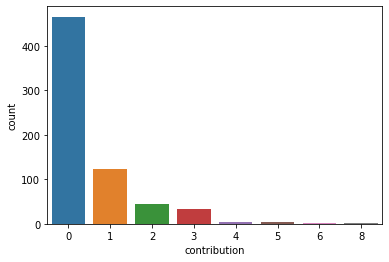

In [4]:
sns.countplot(data=df_refined, x='contribution')
plt.show()

In [5]:
df['contribution'].value_counts()

0    465
1    123
2     44
3     33
4      5
5      4
6      1
8      1
Name: contribution, dtype: int64

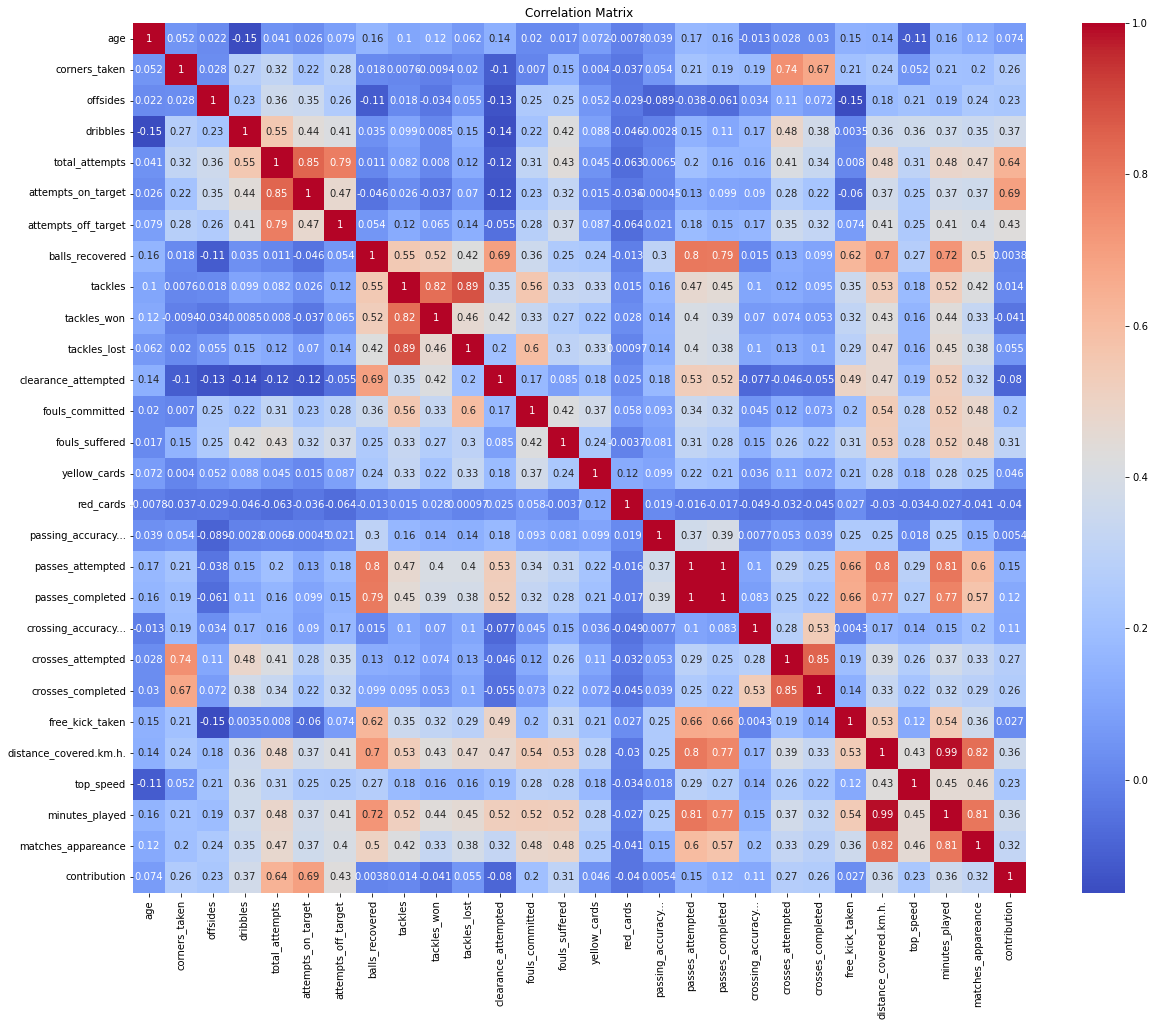

Selected Features: ['dribbles', 'total_attempts', 'attempts_on_target', 'attempts_off_target', 'fouls_suffered', 'distance_covered.km.h.', 'minutes_played', 'matches_appareance', 'contribution']


In [6]:
# Calculate correlation matrix
correlation_matrix = df_refined.corr()

# Plot heatmap for correlation
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Select features with high correlation to the target
target = 'contribution'  # Replace with your target column
correlation_with_target = correlation_matrix[target]
selected_features = correlation_with_target[correlation_with_target.abs() > 0.3].index.tolist()
print("Selected Features:", selected_features)

In [8]:
correlation_with_target.sort_values()

clearance_attempted      -0.079802
tackles_won              -0.040635
red_cards                -0.040347
balls_recovered           0.003834
passing_accuracy...       0.005405
tackles                   0.014278
free_kick_taken           0.027449
yellow_cards              0.045601
tackles_lost              0.055327
age                       0.074120
crossing_accuracy...      0.114291
passes_completed          0.119039
passes_attempted          0.146615
fouls_committed           0.203749
offsides                  0.232465
top_speed                 0.232866
corners_taken             0.258259
crosses_completed         0.259727
crosses_attempted         0.270391
fouls_suffered            0.307475
matches_appareance        0.320523
minutes_played            0.359591
distance_covered.km.h.    0.360289
dribbles                  0.372062
attempts_off_target       0.431052
total_attempts            0.635689
attempts_on_target        0.691757
contribution              1.000000
Name: contribution, 

In [59]:
covariates = ['dribbles', 'total_attempts', 'fouls_suffered', 'distance_covered.km.h.', 'minutes_played', 'field_position', 'contribution']
covariates

['dribbles',
 'total_attempts',
 'fouls_suffered',
 'distance_covered.km.h.',
 'minutes_played',
 'field_position',
 'contribution']

In [ ]:
df_final = df_refined[covariates]
df_final = df_final.join(pd.get_dummies(df_final['field_position']))
df_final = df_final.drop(columns=['field_position', 'Defender'])
df_final = df_final.rename(columns={'distance_covered.km.h.': 'distance_covered'})
df_final

,dribbles,total_attempts,fouls_suffered,distance_covered,minutes_played,contribution,Forward,Midfielder
0,1,2,1,22.34,187,1,False,True
1,2,6,4,24.90,177,0,False,True
2,6,1,4,14.68,139,0,False,True
3,1,0,1,31.08,271,0,False,True
4,0,1,1,20.21,165,0,False,False
...,...,...,...,...,...,...,...,...
671,6,1,1,20.45,173,2,False,True
672,4,5,0,17.78,123,0,False,True
673,0,0,0,2.45,15,0,False,True
674,0,1,2,32.21,276,0,False,False


In [65]:
df_final.describe()

,dribbles,total_attempts,fouls_suffered,distance_covered,minutes_played,contribution
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,2.997041,2.763314,2.081361,22.983979,186.162722,0.538462
std,4.411768,3.313749,2.277271,13.948548,117.578973,1.003697
min,0.000000,0.000000,0.000000,0.330000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,10.742500,85.750000,0.000000
50%,1.000000,2.000000,1.000000,22.835000,182.500000,0.000000
75%,4.000000,4.000000,3.000000,35.252500,286.250000,1.000000
max,34.000000,21.000000,11.000000,50.460000,360.000000,8.000000


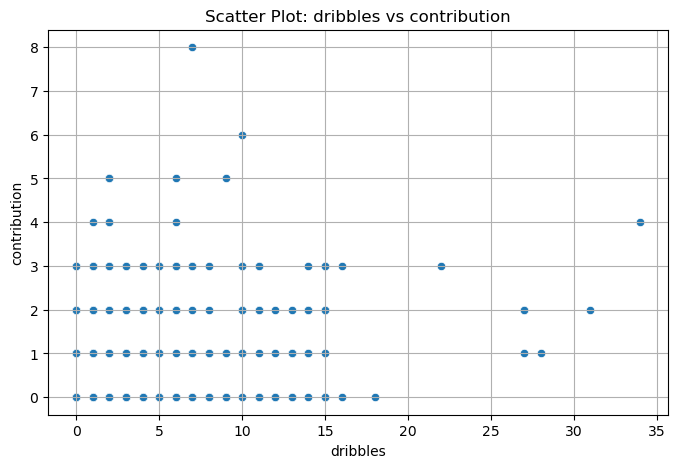

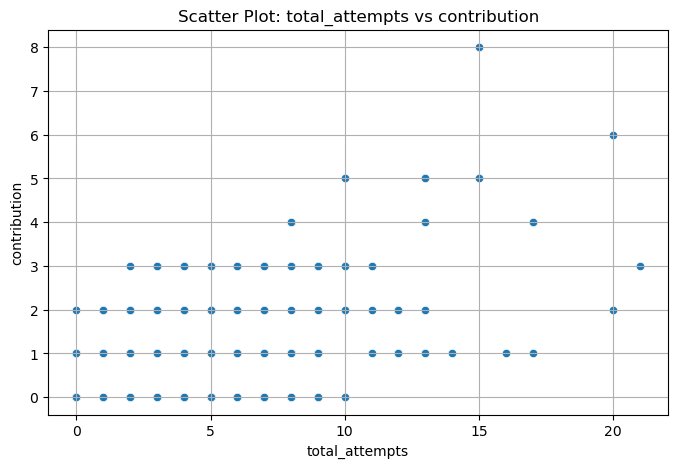

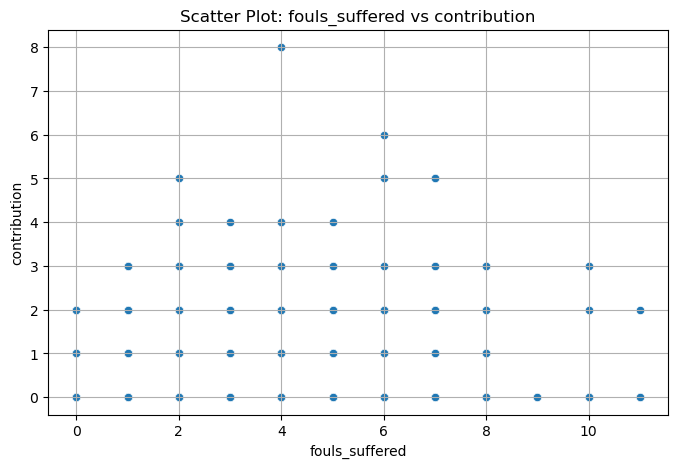

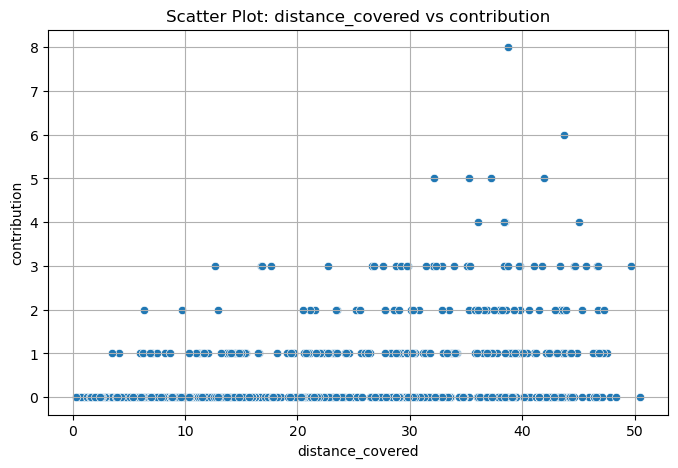

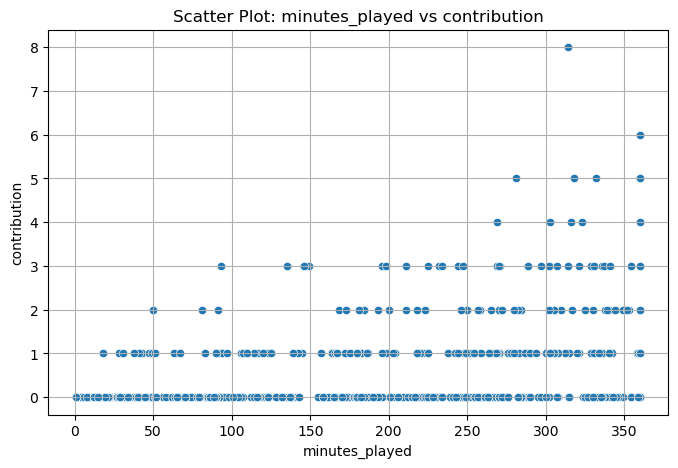

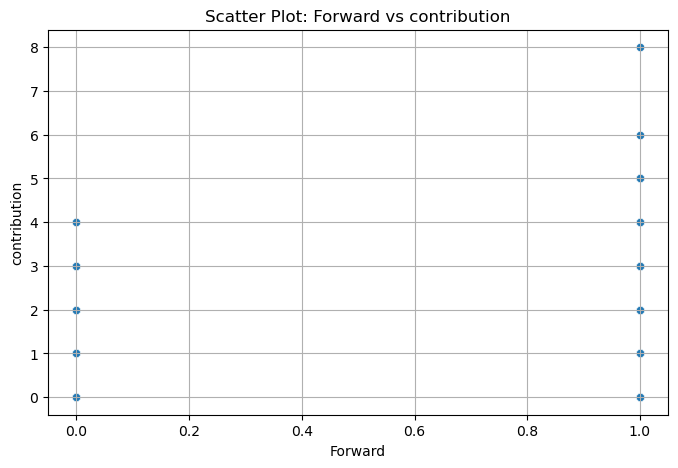

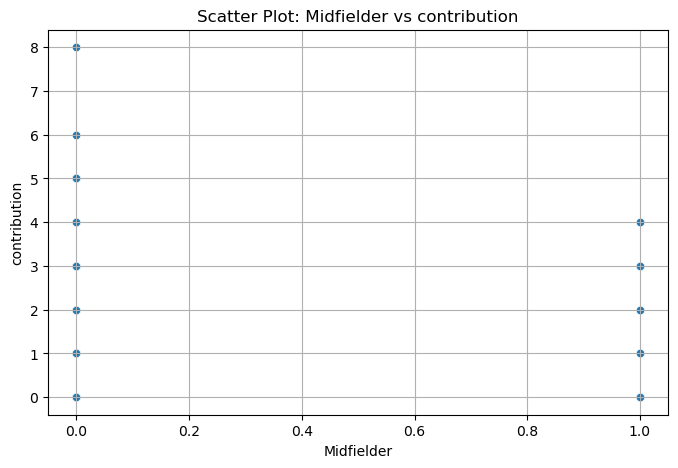

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target variable and covariates
target = 'contribution'  # Replace with the name of your target variable
covariates = [col for col in df_final.columns if col != target]  # Exclude the target variable

# Loop through covariates to create scatter plots
for covariate in covariates:
    plt.figure(figsize=(8, 5))  # Set figure size
    sns.scatterplot(data=df_final, x=covariate, y=target)
    plt.title(f"Scatter Plot: {covariate} vs {target}")
    plt.xlabel(covariate)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()

In [25]:
df_final.to_csv('final_data.csv')

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, gamma, theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.
Sampling: [contribution]


Output()

<Axes: xlabel='contribution'>

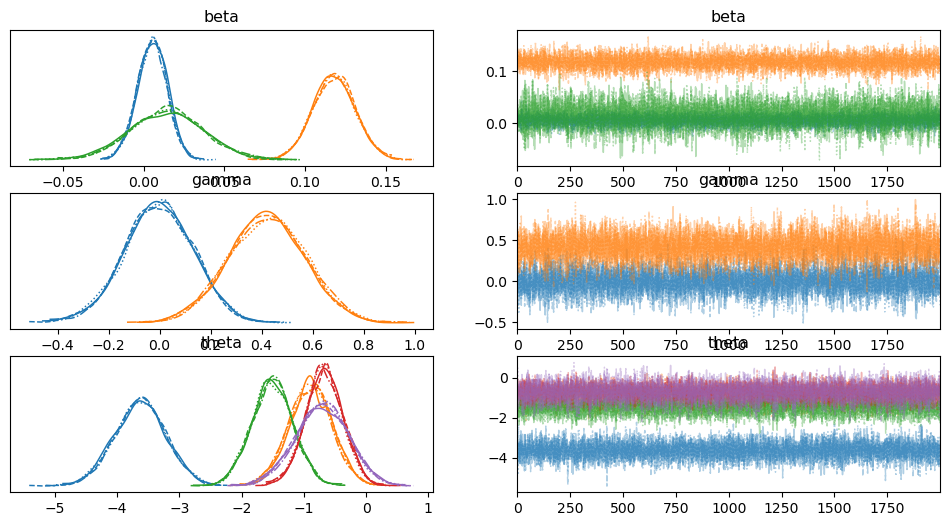

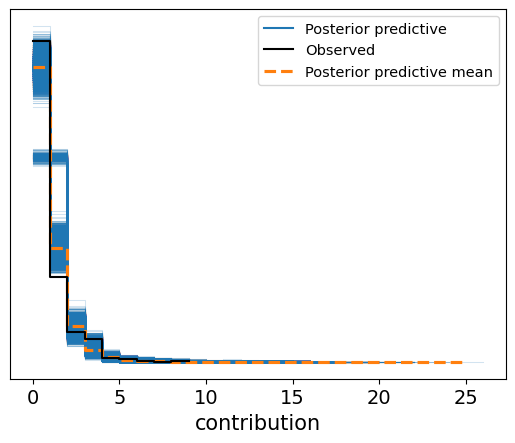

In [ ]:
import pymc as pm
from patsy import dmatrix

# Prepare data: Spline basis matrix for distance_covered
distance_spline = dmatrix("bs(distance_covered, df=5, degree=3) - 1", df_final)

with pm.Model() as model:
    # Priors for regression coefficients and spline weights
    beta = pm.Normal("beta", mu=0, sigma=10, shape=3)          # Linear terms (3 predictors)
    gamma = pm.Normal("gamma", mu=0, sigma=10, shape=2)        # Field position effects (2 categories)
    theta = pm.Normal("theta", mu=0, sigma=1, shape=distance_spline.shape[1])  # Spline weights
    
    # Spline effect: Dot product between spline basis matrix and weights
    distance_effect = pm.math.dot(distance_spline, theta)

    # Poisson likelihood: Rate parameter mu modeled as exp(linear combination + spline effect)
    mu = pm.math.exp(
        beta[0] * df_final["dribbles"] +
        beta[1] * df_final["total_attempts"] +
        beta[2] * df_final["fouls_suffered"] +
        distance_effect +
        gamma[0] * df_final['Midfielder'] + 
        gamma[1] * df_final['Forward']
    )
    
    contribution = pm.Poisson("contribution", mu=mu, observed=df_final["contribution"])

    # Sampling from posterior distribution
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Optional: Posterior predictive checks after sampling completes successfully.
with model:
    ppc = pm.sample_posterior_predictive(trace)

import arviz as az

# Summarize results and visualize diagnostics.
az.plot_trace(trace)       # Trace plots for diagnostics.
az.summary(trace)          # Summary statistics.
az.plot_ppc(ppc)           # Posterior predictive checks.

Sampling: [contribution]


Output()

<Axes: xlabel='contribution'>

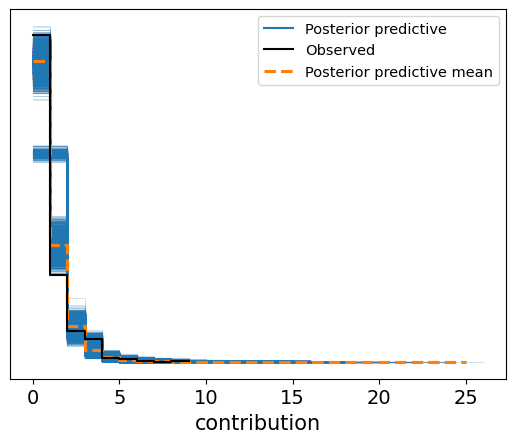

In [76]:
with model:
    ppc = pm.sample_posterior_predictive(trace)

import arviz as az
az.plot_ppc(ppc)

In [72]:
print(ppc.keys())

KeysView(Inference data with groups:
	> posterior_predictive
	> observed_data)
